In [85]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [86]:
# Load the datasets into DataFrames
train_df = pd.read_csv(r"D:\Rahulkumar Shiyani\WLU\Data Analysis\Project\Risk Scoring for Loan Approval Prediction\Datasets\train.csv")
test_df = pd.read_csv(r"D:\Rahulkumar Shiyani\WLU\Data Analysis\Project\Risk Scoring for Loan Approval Prediction\Datasets\test.csv")

# Show the first few rows of the training data
print("Training Dataset (First 5 Rows):")
train_df.head()

Training Dataset (First 5 Rows):


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [88]:
# Get dataset info (e.g., column names, non-null values, data types)
print("Dataset Information:")
train_df.info()

# List all the column names in the dataset
print("\nColumn Names:")
print(train_df.columns)

# Check for missing values
missing_values = train_df.isnull().sum()
print("\nMissing Values (Columns with Missing Data):")
print(missing_values[missing_values > 0])

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Column Names:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Se

In [89]:
# Impute missing values in numerical columns with the mean value
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numerical_cols] = train_df[numerical_cols].fillna(train_df[numerical_cols].mean())

# Impute missing values for categorical columns with the mode (most frequent value)
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# Verify that missing values are handled
print("Missing Values After Imputation:\n")
print(train_df.isnull().sum())

Missing Values After Imputation:

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [90]:
# Find unique values for each categorical column
unique_values = {col: train_df[col].unique().tolist() for col in categorical_cols}

# Display unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")

Unique values in 'Loan_ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008', 'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020', 'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030', 'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041', 'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052', 'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087', 'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100', 'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116', 'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136', 'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151', 'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186', 'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199', 'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222', 'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241', 'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP001253', 'LP001255', 'LP001256', 'LP001259', 'LP001263', 'LP001264', 'LP001265',

In [91]:
from sklearn.calibration import LabelEncoder

label_encoders = {}

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le  # Store the encoder for potential inverse transformations or reuse

# Display the first few rows of the transformed data
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [92]:
# Find unique values for each categorical column
unique_values = {col: train_df[col].unique().tolist() for col in categorical_cols}

# Display unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")

Unique values in 'Loan_ID': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 2

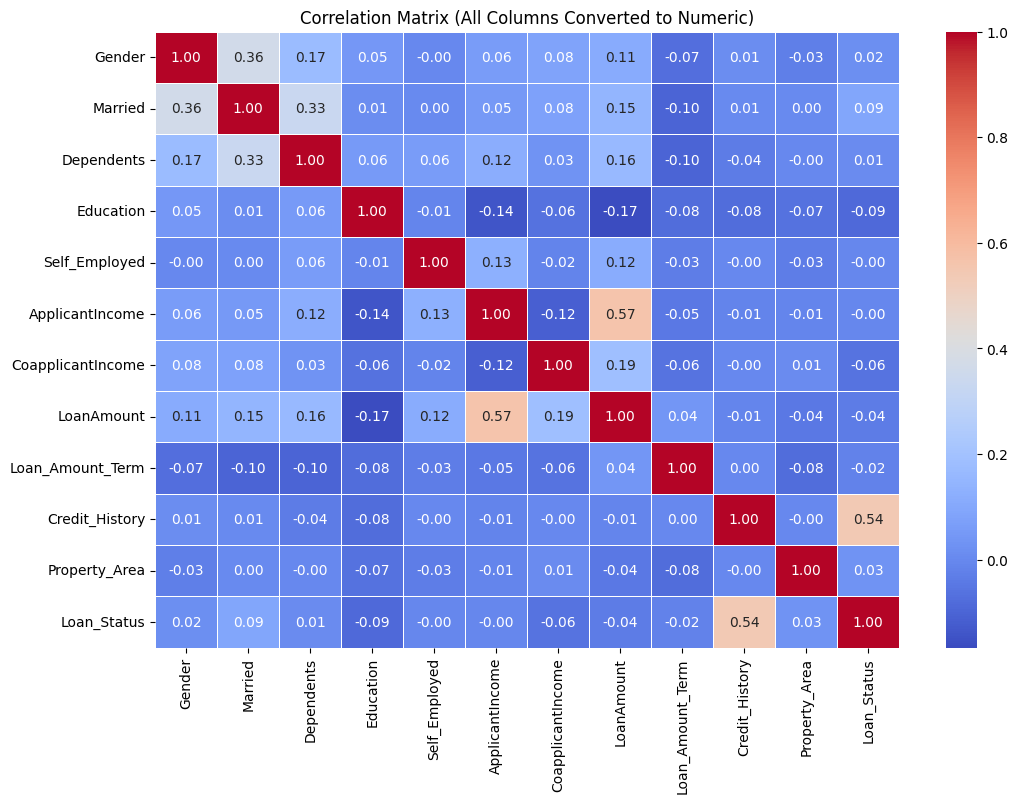

In [93]:
# Exclude identifier column(s) like Loan_ID
train_df_for_corr = train_df.drop(columns=['Loan_ID'])

# Calculate the correlation matrix
correlation = train_df_for_corr.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (All Columns Converted to Numeric)')
plt.show()

In [94]:
train_df_for_corr.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [95]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler  

# Ensure consistent column names
numerical_cols = train_df_for_corr.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical features
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Display the first few rows of the transformed data
print(train_df.head())


   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487    0.000000          0.279851   
1        -0.134412          -0.038732   -0.219273          0.279851   
2        -0.393747          -0.554487   -0.957641          0.279851   
3        -0.462062           0.251980   -0.314547          0.279851   
4         0.097728          -0.554487   -0.064454          0.279851   

   Credit_History  Property_Area  Loan_Status  
0         0.45164              2            1  
1         0.45164              0            0  
2         0.45

In [96]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [97]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Load the data
train_data = pd.read_csv(r"D:\Rahulkumar Shiyani\WLU\Data Analysis\Project\Risk Scoring for Loan Approval Prediction\Datasets\train.csv")
test_data = pd.read_csv(r"D:\Rahulkumar Shiyani\WLU\Data Analysis\Project\Risk Scoring for Loan Approval Prediction\Datasets\test.csv")

# Step 2: Combine train and test data for preprocessing consistency
train_data['source'] = 'train'
test_data['source'] = 'test'
combined_data = pd.concat([train_data, test_data], axis=0)

# Handle missing values
imputer = SimpleImputer(strategy='median')
combined_data['LoanAmount'] = imputer.fit_transform(combined_data[['LoanAmount']])
combined_data['Loan_Amount_Term'] = imputer.fit_transform(combined_data[['Loan_Amount_Term']])
combined_data['Credit_History'] = imputer.fit_transform(combined_data[['Credit_History']])
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    combined_data[col] = combined_data[col].fillna('Unknown')

# Encode categorical variables
encoder = LabelEncoder()
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    combined_data[col] = encoder.fit_transform(combined_data[col])

# Feature engineering
combined_data['Income_to_Loan_Ratio'] = combined_data['ApplicantIncome'] / (combined_data['LoanAmount'] + 1)

# Split the data back
train_data = combined_data[combined_data['source'] == 'train'].drop(['source'], axis=1)
test_data = combined_data[combined_data['source'] == 'test'].drop(['source'], axis=1)

# Prepare training data
X = train_data.drop(columns=['Loan_Status', 'Loan_ID'])
y = train_data['Loan_Status'].map({'Y': 1, 'N': 0})
X_test = test_data.drop(columns=['Loan_Status', 'Loan_ID'], errors='ignore')

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Income_to_Loan_Ratio']
X[numerical_features] = scaler.fit_transform(X[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train XGBoost with GridSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_xgb = grid_search.best_estimator_
y_pred_val = best_xgb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_pred_val))

# Predict on test data
y_test_pred = best_xgb.predict(X_test)

# Save predictions
submission = test_data[['Loan_ID']].copy()
submission['Loan_Status'] = ['Y' if pred == 1 else 'N' for pred in y_test_pred]
submission.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Validation Accuracy: 0.7514792899408284
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        94
           1       0.66      0.89      0.76        75

    accuracy                           0.75       169
   macro avg       0.77      0.77      0.75       169
weighted avg       0.79      0.75      0.75       169

Predictions saved to submission.csv


In [98]:
# Import additional libraries
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Base models
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
xgb_model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42, eval_metric='logloss')
svc_model = SVC(probability=True, kernel='linear', random_state=42)

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('svc', svc_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit the Stacking Classifier
stacking_model.fit(X_train, y_train)

# Evaluate the model
y_pred_val = stacking_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Stacking:", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_pred_val))


Validation Accuracy with Stacking: 0.757396449704142
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        94
           1       0.67      0.89      0.77        75

    accuracy                           0.76       169
   macro avg       0.78      0.77      0.76       169
weighted avg       0.79      0.76      0.76       169



In [109]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import accuracy_score, classification_report
# from xgboost import XGBClassifier
# import lightgbm as lgb

# # Step 1: Load the data
# train_data = pd.read_csv(r"D:\Rahulkumar Shiyani\WLU\Data Analysis\Project\Risk Scoring for Loan Approval Prediction\Datasets\train.csv")
# test_data = pd.read_csv(r"D:\Rahulkumar Shiyani\WLU\Data Analysis\Project\Risk Scoring for Loan Approval Prediction\Datasets\test.csv")


# # Step 2: Combine train and test data for preprocessing consistency
# train_data['source'] = 'train'
# test_data['source'] = 'test'
# combined_data = pd.concat([train_data, test_data], axis=0)

# # Step 3: Handle missing values
# imputer = SimpleImputer(strategy='median')
# combined_data['LoanAmount'] = imputer.fit_transform(combined_data[['LoanAmount']])
# combined_data['Loan_Amount_Term'] = imputer.fit_transform(combined_data[['Loan_Amount_Term']])
# combined_data['Credit_History'] = imputer.fit_transform(combined_data[['Credit_History']])

# for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
#     combined_data[col] = combined_data[col].fillna('Unknown')

# # Step 4: Encode categorical variables
# encoder = LabelEncoder()
# for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
#     combined_data[col] = encoder.fit_transform(combined_data[col])

# # Step 5: Feature Engineering
# combined_data['Income_to_Loan_Ratio'] = combined_data['ApplicantIncome'] / (combined_data['LoanAmount'] + 1)
# combined_data['Total_Income'] = combined_data['ApplicantIncome'] + combined_data['CoapplicantIncome']
# combined_data['EMI'] = combined_data['LoanAmount'] / combined_data['Loan_Amount_Term']

# # Step 6: Remove Outliers
# Q1 = combined_data['ApplicantIncome'].quantile(0.25)
# Q3 = combined_data['ApplicantIncome'].quantile(0.75)
# IQR = Q3 - Q1
# combined_data = combined_data[
#     (combined_data['ApplicantIncome'] >= Q1 - 1.5 * IQR) & 
#     (combined_data['ApplicantIncome'] <= Q3 + 1.5 * IQR)
# ]

# # Step 7: Split data back into train and test
# train_data = combined_data[combined_data['source'] == 'train'].drop(['source'], axis=1)
# test_data = combined_data[combined_data['source'] == 'test'].drop(['source'], axis=1)

# # Step 8: Prepare data for modeling
# X = train_data.drop(columns=['Loan_Status', 'Loan_ID'])
# y = train_data['Loan_Status'].map({'Y': 1, 'N': 0})
# X_test = test_data.drop(columns=['Loan_Status', 'Loan_ID'], errors='ignore')

# # Standardize numerical features
# scaler = StandardScaler()
# numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
#                       'Income_to_Loan_Ratio', 'Total_Income', 'EMI']
# X[numerical_features] = scaler.fit_transform(X[numerical_features])
# X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# # Train-validation split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 9: Train LightGBM model
# lgb_model = lgb.LGBMClassifier(
#     boosting_type='gbdt',
#     n_estimators=500,
#     learning_rate=0.05,
#     max_depth=5,
#     class_weight='balanced',
#     random_state=42
# )

# # Cross-validation
# cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy')
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

# # Fit the model and evaluate
# lgb_model.fit(X_train, y_train)
# y_pred_val = lgb_model.predict(X_val)

# print("\nValidation Accuracy:", accuracy_score(y_val, y_pred_val))
# print("\nClassification Report:")
# print(classification_report(y_val, y_pred_val))

# # Step 10: Predict on test data and save to submission.csv
# y_test_pred = lgb_model.predict(X_test)

# submission = test_data[['Loan_ID']].copy()
# submission['Loan_Status'] = ['Y' if pred == 1 else 'N' for pred in y_test_pred]
# submission.to_csv('submission.csv', index=False)
# print("\nPredictions saved to submission.csv")

In [108]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.metrics import accuracy_score, classification_report
# import lightgbm as lgb

# # Step 1: Load the data
# train_data = pd.read_csv(r"D:\Rahulkumar Shiyani\WLU\Data Analysis\Project\Risk Scoring for Loan Approval Prediction\Datasets\train.csv")
# test_data = pd.read_csv(r"D:\Rahulkumar Shiyani\WLU\Data Analysis\Project\Risk Scoring for Loan Approval Prediction\Datasets\test.csv")


# # Step 2: Preprocessing
# train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
# train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)
# train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

# for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
#     train_data[col].fillna('Unknown', inplace=True)

# # Encode categorical variables
# encoder = LabelEncoder()
# for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
#     train_data[col] = encoder.fit_transform(train_data[col])

# # Step 3: Feature Engineering
# train_data['Income_to_Loan_Ratio'] = train_data['ApplicantIncome'] / (train_data['LoanAmount'] + 1)
# train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
# train_data['EMI'] = train_data['LoanAmount'] / train_data['Loan_Amount_Term']

# # Step 4: Prepare Data for Training
# X = train_data.drop(columns=['Loan_Status', 'Loan_ID'])
# y = train_data['Loan_Status'].map({'Y': 1, 'N': 0})

# # Standardize numerical features
# scaler = StandardScaler()
# numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
#                       'Income_to_Loan_Ratio', 'Total_Income', 'EMI']
# X[numerical_features] = scaler.fit_transform(X[numerical_features])

# # Split data into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Step 5: Model Training with GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.05, 0.1],
#     'colsample_bytree': [0.8, 1.0]
# }

# lgb_model = lgb.LGBMClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Step 6: Evaluate the Best Model
# best_model = grid_search.best_estimator_
# y_pred_val = best_model.predict(X_val)

# print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
# print("Classification Report:")
# print(classification_report(y_val, y_pred_val))

# # Step 7: Ensemble Model
# rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
# lr_model = LogisticRegression()

# ensemble_model = VotingClassifier(estimators=[
#     ('lgb', best_model),
#     ('rf', rf_model),
#     ('lr', lr_model)
# ], voting='hard')

# ensemble_model.fit(X_train, y_train)
# y_pred_ensemble = ensemble_model.predict(X_val)

# print("\nEnsemble Model Accuracy:", accuracy_score(y_val, y_pred_ensemble))
# print("Ensemble Model Report:\n", classification_report(y_val, y_pred_ensemble))

In [107]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.metrics import accuracy_score, classification_report
# import lightgbm as lgb
# import shap

# # Step 1: Load the data
# train_data = pd.read_csv(r"D:\Rahulkumar Shiyani\WLU\Data Analysis\Project\Risk Scoring for Loan Approval Prediction\Datasets\train.csv")
# test_data = pd.read_csv(r"D:\Rahulkumar Shiyani\WLU\Data Analysis\Project\Risk Scoring for Loan Approval Prediction\Datasets\test.csv")


# # Step 2: Preprocessing
# train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
# train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)
# train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

# for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
#     train_data[col].fillna('Unknown', inplace=True)

# # Encode categorical variables
# encoder = LabelEncoder()
# for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
#     train_data[col] = encoder.fit_transform(train_data[col])

# # Step 3: Feature Engineering
# train_data['Income_to_Loan_Ratio'] = train_data['ApplicantIncome'] / (train_data['LoanAmount'] + 1)
# train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
# train_data['EMI'] = train_data['LoanAmount'] / train_data['Loan_Amount_Term']
# train_data['Credit_and_Term'] = train_data['Credit_History'] * train_data['Loan_Amount_Term']

# # Step 4: Prepare Data for Training
# X = train_data.drop(columns=['Loan_Status', 'Loan_ID'])
# y = train_data['Loan_Status'].map({'Y': 1, 'N': 0})

# # Standardize numerical features
# scaler = StandardScaler()
# numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
#                       'Income_to_Loan_Ratio', 'Total_Income', 'EMI', 'Credit_and_Term']
# X[numerical_features] = scaler.fit_transform(X[numerical_features])

# # Split data into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Step 5: Model Training with GridSearchCV
# param_grid = {
#     'n_estimators': [150, 200, 250],
#     'max_depth': [4, 5, 6],
#     'learning_rate': [0.05, 0.07, 0.1],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# lgb_model = lgb.LGBMClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=1)
# grid_search.fit(X_train, y_train)

# # Step 6: Evaluate the Best Model
# best_model = grid_search.best_estimator_
# y_pred_val = best_model.predict(X_val)

# print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
# print("Classification Report:")
# print(classification_report(y_val, y_pred_val))

# # Step 7: Feature Importance with SHAP
# explainer = shap.Explainer(best_model, X_train)
# shap_values = explainer(X_val)
# shap.summary_plot(shap_values, X_val)

# # Step 8: Ensemble Model
# rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
# lr_model = LogisticRegression(max_iter=500)

# ensemble_model = VotingClassifier(estimators=[
#     ('lgb', best_model),
#     ('rf', rf_model),
#     ('lr', lr_model)
# ], voting='hard')

# ensemble_model.fit(X_train, y_train)
# y_pred_ensemble = ensemble_model.predict(X_val)

# print("\nEnsemble Model Accuracy:", accuracy_score(y_val, y_pred_ensemble))
# print("Ensemble Model Report:\n", classification_report(y_val, y_pred_ensemble))

# # Step 9: Predict on Test Data and Save Submission
# # Ensure test data has the same features as training data
# # Ensure test data has the same preprocessing as training
# test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
# test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)
# test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

# for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
#     test_data[col].fillna('Unknown', inplace=True)

# # Encode categorical variables (using the same encoder as training)
# for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
#     test_data[col] = encoder.fit_transform(test_data[col])

# # Add engineered features
# test_data['Income_to_Loan_Ratio'] = test_data['ApplicantIncome'] / (test_data['LoanAmount'] + 1)
# test_data['Total_Income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
# test_data['EMI'] = test_data['LoanAmount'] / test_data['Loan_Amount_Term']
# test_data['Credit_and_Term'] = test_data['Credit_History'] * test_data['Loan_Amount_Term']

# # Prepare test features
# X_test = test_data.drop(columns=['Loan_ID'])
# X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# # Predict using the ensemble model
# y_test_pred = ensemble_model.predict(X_test)

# # Save predictions
# submission = test_data[['Loan_ID']].copy()
# submission['Loan_Status'] = ['Y' if pred == 1 else 'N' for pred in y_test_pred]
# submission.to_csv('submission.csv', index=False)

# print("Predictions saved to submission.csv")

In [60]:
# Prepare data
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore", category=UserWarning)

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Prepare data
X = train_df.drop(columns=['Loan_Status'])
y = train_df['Loan_Status']

# Convert Loan_Status to binary labels if needed
if y.dtypes == 'float64':
    y = (y >= 0.5).astype(int)  # Convert to 0 or 1

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Baseline Model: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

# Model Evaluation
print("Logistic Regression Results:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]):.4f}")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Predict Probabilities for the Positive Class
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]  # Extract probabilities for class 1

# Step 2: Compute ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

# Step 3: Print Performance Metrics
print(f"\nLogistic Regression AUC-ROC:{roc_auc:.4f}\n")

# Step 4: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Logistic Regression Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Advanced Model: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.4f}")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Predict Probabilities for the Positive Class
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  # Extract probabilities for class 1

# Step 2: Compute ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Step 3: Print Performance Metrics
print(f"\nRandom Forest AUC-ROC:{roc_auc:.4f}\n")

# Step 4: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Advanced Model: XGBoost
# Hyperparameter Tuning Manually
best_params = {}
best_f1 = 0

for n_estimators in [50, 100, 200]:
    for max_depth in [3, 5, 10]:
        for learning_rate in [0.01, 0.1, 0.2]:
            # Train model with these parameters
            xgb = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate,
                                eval_metric='logloss', random_state=42)
            xgb.fit(X_train, y_train)
            y_pred = xgb.predict(X_test)
            f1 = f1_score(y_test, y_pred)

            # Update best parameters
            if f1 > best_f1:
                best_f1 = f1
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}

# Train the best model
best_xgb = XGBClassifier(**best_params, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)
y_pred_best = best_xgb.predict(X_test)

# Evaluate the final model
print("After Tuning XGBoost Model Results:\n")
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]):.4f}")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Predict Probabilities for the Positive Class
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]  # Extract probabilities for class 1

# Step 2: Compute ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)

# Step 3: Print Performance Metrics
print(f"\nAfter Tuning XGBoost AUC-ROC:{roc_auc:.4f}\n")

# Step 4: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('XGBoost Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# XGBoost Classifier with Hyperparameter Tuning
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best XGBoost model
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the model
print("\nXGBoost Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]):.4f}")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Predict Probabilities for the Positive Class
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]  # Extract probabilities for class 1

# Step 2: Compute ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)

# Step 3: Print Performance Metrics
print(f"\n XGBoost AUC-ROC:{roc_auc:.4f}\n")

# Step 4: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('XGBoost Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Advanced Model: Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Print Decision Tree Results
print("Decision Tree Results:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]):.4f}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Step 2: Predict probabilities for the positive class
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]  # Extract probabilities for class 1

# Step 3: Compute ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)
roc_auc = roc_auc_score(y_test, y_pred_proba_dt)

# Step 3: Print Performance Metrics
print(f"\n Decision Tree AUC-ROC:{roc_auc:.4f}\n")

# Step 4: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Predict Probabilities for the Positive Class
# Logistic Regression
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Random Forest
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Step 2: Print AUC-ROC Values
print(f"\nLogistic Regression AUC-ROC: {roc_auc_lr:.4f}")
print(f"Random Forest AUC-ROC: {roc_auc_rf:.4f}")

# Step 3: Plot Combined ROC Curves
plt.figure(figsize=(8, 6))

# Plot Logistic Regression ROC curve
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')

# Plot Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

# Plot Random Guess Line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guess')

# Customization
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Logistic Regression and Random Forest', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)

# Step 4: Show the Plot
plt.show()

In [ ]:
# Generate the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [ ]:
print("Random Forest Results:\n\n")

print(classification_report(y_test, y_pred_rf))

In [ ]:
print("XGBoost Results:\n\n")

print(classification_report(y_test, y_pred_best))

In [ ]:
print("Logistic Regression Results:\n\n")

print(classification_report(y_test, y_pred_lr))

In [ ]:
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore", category=UserWarning)

X = train_df.drop(columns=['Loan_Status','Loan_ID'])
y = train_df['Loan_Status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 5, 10, 20],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],       # Number of features to consider at each split
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

# Predict using the best Random Forest model
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
print("\nBest Random Forest Model Results:")
print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf_best):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]):.4f}")

In [ ]:
print("After HyperParameter Random Forest Results:\n\n")

print(classification_report(y_test, y_pred_rf_best))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200, 500],      # Number of trees in the forest
    'max_depth': [3, 5, 10, None],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']          # Number of features to consider when looking for the best split
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_model,
                                      param_distributions=rf_param_grid,
                                      n_iter=50,  # Number of parameter settings sampled
                                      scoring='f1',  # Optimize for F1 score
                                      cv=3,  # 3-fold cross-validation
                                      random_state=42,
                                      n_jobs=-1,  # Use all available cores
                                      verbose=2)
# Fit the model
rf_random_search.fit(X_train, y_train)

# Get the best model and parameters
best_rf = rf_random_search.best_estimator_
print(f"Best Parameters: {rf_random_search.best_params_}")

# Predict using the best model
y_pred_rf_best = best_rf.predict(X_test)

# Evaluate the model
print("\nTuned Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf_best):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]):.4f}")

In [ ]:
print("Tuned Random Forest Results:\n\n")

print(classification_report(y_test, y_pred_rf_best))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define model outputs in a structured way
results = [
    {"Model": "Logistic Regression", "Accuracy": 0.8618, "F1 Score": 0.9081, "AUC-ROC": 0.7994},
    {"Model": "Random Forest", "Accuracy": 0.8455, "F1 Score": 0.8962, "AUC-ROC": 0.8320},
    {"Model": "XGBoost", "Accuracy": 0.8537, "F1 Score": 0.9032, "AUC-ROC": 0.7879},
    {"Model": "Tuned Random Forest", "Accuracy": 0.8537, "F1 Score": 0.9032, "AUC-ROC": 0.8059},
]

# Convert results into a DataFrame
df_results = pd.DataFrame(results)

# Plot the metrics for all models
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.25  # Width of the bars
index = range(len(df_results))

# Create bars
bar1 = plt.bar([i - bar_width for i in index], df_results['Accuracy'], bar_width, label='Accuracy')
bar2 = plt.bar(index, df_results['F1 Score'], bar_width, label='F1 Score')
bar3 = plt.bar([i + bar_width for i in index], df_results['AUC-ROC'], bar_width, label='AUC-ROC')

# Add data labels for each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                 ha='center', va='bottom', fontsize=10)

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

# Add labels and title
plt.title("Comparison of Models Based on Accuracy, F1 Score, and AUC-ROC", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(index, df_results['Model'], rotation=45, ha="right", fontsize=12)
plt.legend(title="Metrics", loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1, fontsize=12, frameon=True, shadow=True)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Print Predictions
print("\nPredictions:")
print(y_pred_lr)

# Step 5: Save Predictions to a Text File
with open("logistic_regression_predictions.txt", "w") as file:
    file.write("Logistic Regression Predictions:\n")
    file.write("\n".join(map(str, y_pred_lr)))

print("\nPredictions saved to 'logistic_regression_predictions.txt'")

In [84]:
# Thank You & Regards
# Team 13
# Rahulkumar Shiyani(245808110)
# Madhvesh Chokshi(245814690)
